In [ ]:
# %%html
# <script>
# code_show=true; 
# function code_toggle() {
#  if (code_show){
#  $('div.input').hide();
#  } else {
#  $('div.input').show();
#  }
#  code_show = !code_show
# } 
# $( document ).ready(code_toggle);


# </script>


# <form action="javascript:code_toggle()"><input type="submit" value=" 
# Curso: Diseño y mantenimiento de instalaciones de energía solar fotovoltaica
# Alumno: Francisco Manuel Roman Gamez

# "></form>

In [1]:

# https://ec.europa.eu/jrc/en/PVGIS/docs/noninteractive
# https://ec.europa.eu/jrc/en/PVGIS/releases/pvgis51
# https://re.jrc.ec.europa.eu/pvg_tools/es/#MR

from flask import Flask, jsonify, render_template, request, session
import pandas as pd # data wrangling
import requests as requests
import pandas as pd 
import json
import datetime
from math import pi

import numpy as np
import matplotlib.pyplot as plt
# 

In [2]:
# datos del navegador
# hora = request.args.get('hora', 0, type=int)
# alpha = request.args.get('orientacion', 0, type=int)
# phi = request.args.get('latitud', 0, type=int)
# lon = request.args.get('longitud', 0, type=int)
# fecha = request.args.get('fecha',default = datetime.date.today(), type = toDate)

hora = 13
alpha = 1
phi = 37
lon = -4
fecha = datetime.datetime.now()
tamb=22 # temperatura ambiente en sombra
pcc=1200 # Medida con pinza amperimétrica y voltímetro a la entrada del inversor
# datos para la url a pvgis
# lon=beta
beta=hora

lat=str(phi)
lon=str(lon)
mes=fecha.strftime("%m")
# print(mes,hora)


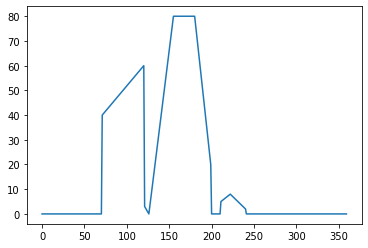

In [55]:


# vvalores inciales

pp=[[-180,0],[-110,0],[-109,2],[-60,4],[-55,3],[-54,0],[-20,0],[-19,20],[0,22],[19,20],[20,0],[30,0],[31,5],[40,7],[60,2],[61,0],[179,0]]
pp=[[-180,0],[-110,0],[-109,40],[-60,60],[-59,3],[-54,0],[-25,0],[-25,80],[0,80],[19,20],[20,0],[30,0],[31,5],[40,7],[60,2],[61,0],[179,0]]
df=pd.DataFrame(pp)


# cuando se modifica un punto en el front
punto='0,12,42,8'

ppunto = pd.DataFrame([x.split(',') for x in punto.split('\n')])
ppunto=ppunto.astype(int)
# actualiza la tabla de puntos
df.at[(ppunto.at[0,0]*3+ppunto.at[0,1]+1),0]=ppunto.at[0,2]
df.at[(ppunto.at[0,0]*3+ppunto.at[0,1]+1),1]=ppunto.at[0,3]
df[0]=df[0]+180
# df
# fig,ax=plt.subplots(figsize=(15,8))
# ax.plot(df[0],df[1])
# # .tolist()
# para crear los 360 puntos para el pvgis
d = pd.Series(np.nan, index=np.arange(360))

ii=df.index.tolist()
for i in ii: 
    d.at[df.at[i,0]]=df.at[i,1]
d=d.interpolate()
d=d.T
d.plot()
# df

In [56]:
hh=d.tolist()
hh = [round(x,2) for x in hh]
len(hh)
hh=hh[0:359]
len(hh)

359

In [57]:
with open('hhh.txt', 'w') as f:
    for item in hh:
        f.write("%s\n" % item)

In [58]:
# str(hh).strip('[]')

In [59]:
# Calculos
# ????????????????   irraciacion
# url="https://re.jrc.ec.europa.eu/api/DRcalc?lat="+lat+"&lon="+lon+"&month="+mes+"&global=1"

url="https://re.jrc.ec.europa.eu/api/PVcalc?lat="+lat+"&lon="+lon+"&peakpower=1&loss=0"
    
url=url+"&localtime=1"
url=url+"&outputformat=json"
# hh=[0,10,20,80,40,15,25,5]
url=url+"&userhorizon="+str(hh).strip('[]')
# print(url)
r = requests.get(url)
data = r.json()
data

{'inputs': {'location': {'latitude': 37.0,
   'longitude': -4.0,
   'elevation': 999.0},
  'meteo_data': {'radiation_db': 'PVGIS-SARAH',
   'meteo_db': 'ERA-Interim',
   'year_min': 2005,
   'year_max': 2016,
   'use_horizon': True,
   'horizon_db': 'DEM-calculated'},
  'mounting_system': {'fixed': {'slope': {'value': 0, 'optimal': False},
    'azimuth': {'value': 0, 'optimal': False},
    'type': 'free-standing'}},
  'pv_module': {'technology': 'c-Si', 'peak_power': 1.0, 'system_loss': 0.0},
  'economic_data': {'system_cost': None, 'interest': None, 'lifetime': None}},
 'outputs': {'monthly': {'fixed': [{'month': 1,
     'E_d': 1.32,
     'E_m': 40.96,
     'H(i)_d': 1.48,
     'H(i)_m': 45.93,
     'SD_m': 2.16},
    {'month': 2,
     'E_d': 2.08,
     'E_m': 58.21,
     'H(i)_d': 2.23,
     'H(i)_m': 62.35,
     'SD_m': 4.99},
    {'month': 3,
     'E_d': 3.13,
     'E_m': 97.11,
     'H(i)_d': 3.32,
     'H(i)_m': 102.97,
     'SD_m': 9.71},
    {'month': 4,
     'E_d': 3.88,
     

In [15]:
d = pd.Series(0, index=np.arange(359))
hh=d.tolist()


In [61]:
# Calculos
# ????????????????   irraciacion
# url="https://re.jrc.ec.europa.eu/api/DRcalc?lat="+lat+"&lon="+lon+"&month="+mes+"&global=1"

url="https://re.jrc.ec.europa.eu/api/PVcalc?lat="+lat+"&lon="+lon+"&peakpower=1&loss=0"
    
url=url+"&localtime=1"
url=url+"&outputformat=json"
url=url+"&userhorizon="+str(hh).strip('[]')

# url=url+"&userhorizon="+str(hh).strip('[]')
# print(url)
r = requests.get(url)
data = r.json()
data
j=data["outputs"]["monthly"]
j

{'fixed': [{'month': 1,
   'E_d': 1.32,
   'E_m': 40.96,
   'H(i)_d': 1.48,
   'H(i)_m': 45.93,
   'SD_m': 2.16},
  {'month': 2,
   'E_d': 2.08,
   'E_m': 58.21,
   'H(i)_d': 2.23,
   'H(i)_m': 62.35,
   'SD_m': 4.99},
  {'month': 3,
   'E_d': 3.13,
   'E_m': 97.11,
   'H(i)_d': 3.32,
   'H(i)_m': 102.97,
   'SD_m': 9.71},
  {'month': 4,
   'E_d': 3.88,
   'E_m': 116.45,
   'H(i)_d': 4.21,
   'H(i)_m': 126.34,
   'SD_m': 10.62},
  {'month': 5,
   'E_d': 4.56,
   'E_m': 141.24,
   'H(i)_d': 5.02,
   'H(i)_m': 155.62,
   'SD_m': 7.74},
  {'month': 6,
   'E_d': 5.32,
   'E_m': 159.52,
   'H(i)_d': 6.05,
   'H(i)_m': 181.43,
   'SD_m': 6.41},
  {'month': 7,
   'E_d': 5.24,
   'E_m': 162.56,
   'H(i)_d': 6.08,
   'H(i)_m': 188.6,
   'SD_m': 3.31},
  {'month': 8,
   'E_d': 4.5,
   'E_m': 139.61,
   'H(i)_d': 5.18,
   'H(i)_m': 160.68,
   'SD_m': 3.53},
  {'month': 9,
   'E_d': 3.38,
   'E_m': 101.48,
   'H(i)_d': 3.79,
   'H(i)_m': 113.66,
   'SD_m': 6.27},
  {'month': 10,
   'E_d': 2.47,
  

In [64]:
jf= json.dumps(j, indent=2)
df=pd.read_json(jf, orient='records') 
df

,fixed
0,"{'month': 1, 'E_d': 1.32, 'E_m': 40.96, 'H(i)_..."
1,"{'month': 2, 'E_d': 2.08, 'E_m': 58.21, 'H(i)_..."
2,"{'month': 3, 'E_d': 3.13, 'E_m': 97.11, 'H(i)_..."
3,"{'month': 4, 'E_d': 3.88, 'E_m': 116.45, 'H(i)..."
4,"{'month': 5, 'E_d': 4.5600000000000005, 'E_m':..."
5,"{'month': 6, 'E_d': 5.32, 'E_m': 159.52, 'H(i)..."
6,"{'month': 7, 'E_d': 5.24, 'E_m': 162.56, 'H(i)..."
7,"{'month': 8, 'E_d': 4.5, 'E_m': 139.61, 'H(i)_..."
8,"{'month': 9, 'E_d': 3.38, 'E_m': 101.48, 'H(i)..."
9,"{'month': 10, 'E_d': 2.47, 'E_m': 76.48, 'H(i)..."


In [ ]:
# Calculos
# ????????????????   irraciacion
# url="https://re.jrc.ec.europa.eu/api/DRcalc?lat="+lat+"&lon="+lon+"&month="+mes+"&global=1"

url="https://re.jrc.ec.europa.eu/api/PVcalc?lat="+lat+"&lon="+lon+"&peakpower=1&loss=0"
    
url=url+"&localtime=1"
url=url+"&outputformat=json"
# print(url)
r = requests.get(url)
data = r.json()
data

In [ ]:
j=data["outputs"]["daily_profile"]
jf= json.dumps(j, indent=2)
df=pd.read_json(jf, orient='records') 
irradiacion=df.at[hora,'G(i)']
# print(irradiacion)
dfp=df
df=df.to_html()

E=irradiacion
# E=850 para probar con los datos del idae

# ax=dfp.plot(kind='bar',y=['G(i)']);ax.set_ylabel("$MJ / m^2 * d$");
E

In [ ]:
iindex=['$l_{cab}$', '$g$', '$TONC$','$l_{tem}$','$l_{dis}$','$l_{ref}$']
ccolumns=['$Parametro$','$Unidades$','$Valor$','$Comentario$']

tonc=['TONC','$^oC$',33, 'Obtenido del catálogo']
EE=['E', '$W/m^2$', 44, 'Irradiancia segun PROMEDIO DIARIOS DE PVGIS']


TIV=pd.DataFrame()
TIV=pd.DataFrame(np.array([tonc,EE]),
                    columns=ccolumns)

TIV

{{dfp}}